In [1]:
# Import library
import pandas as pd
pd.options.mode.chained_assignment = None
pd.set_option('max_colwidth',1)
import numpy as np
seed = 0
np.random.seed(seed)
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

import nest_asyncio
nest_asyncio.apply()
import seaborn as sns

import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [2]:
data = pd.read_csv('dataset/dataig.csv')
data

,username,komentar
0,joelliea,"Login pake nomor hape yang SUDAH TERDAFTAR di Peduli Lindungi, ga bisa dan diminta register. Lanjut register dengan nomor hape YANG SAMA dan YANG SELAMA INI DIPAKAI untuk masuk ke Peduli Lindungi (ga pernah ganti nomor!), masuk ke Satu Sehat tapi NAMA TIDAK DITEMUKAN, NIK TIDAK DITEMUKAN (kapan saya pernah ganti nama dan ganti NIK padahal udah vaksin 3x toloong!). Logout dan coba login lagi dengan nomor hape yang sama .. diminta register lagi. Ini aplikasi Satu Sehat wajib diinstall ga sih? Wajib/perlu dipake? Kalo ga perlu, aku delete aja deh. Kok ribet mau login/daftar aja ??!!!"
1,soffi.septiana,Gabisa login sama sekali😢
2,peplizaza,"Sertifikat vaksin booster ke 2 ku gk masuk, gimana itu?"
3,triamayanti92,"Ga jelas bgt, malah ilang sertifikat nya boss"
4,ulfahnurra,"Plis kalo bikin aplikasi yg bagus ya pak bu, aplikasi masih banyak bug jangan di rilis duluuu👍👍👍👍"
...,...,...
3098,pratamakamiliki,❤️
3099,dmini4596,"Tolong min saya sudah vaksin boster tapi setelah ganti di SATUSEHAT kembali lagi ke vaksin2 dan sertifikatnya nggak ada ,tolong itu bisa kembali apa gimana @pedulilindungi.id"
3100,astitirahayu_,Udah vaksin 4x tapi vaksin terakhir hilang stelah update😢
3101,afrilianiputri_,"Sudah bisa login, tapi sertifikat vaksinnya gaada. Dan juga info vaksin masih booster pertama, padahal sudah booster kedua. Semoga bisa disempurnakan lagi aplikasinya."


In [3]:
data = data[['komentar']]

In [4]:
data.shape

(3103, 1)

In [5]:
data.head(10)

,komentar
0,"Login pake nomor hape yang SUDAH TERDAFTAR di Peduli Lindungi, ga bisa dan diminta register. Lanjut register dengan nomor hape YANG SAMA dan YANG SELAMA INI DIPAKAI untuk masuk ke Peduli Lindungi (ga pernah ganti nomor!), masuk ke Satu Sehat tapi NAMA TIDAK DITEMUKAN, NIK TIDAK DITEMUKAN (kapan saya pernah ganti nama dan ganti NIK padahal udah vaksin 3x toloong!). Logout dan coba login lagi dengan nomor hape yang sama .. diminta register lagi. Ini aplikasi Satu Sehat wajib diinstall ga sih? Wajib/perlu dipake? Kalo ga perlu, aku delete aja deh. Kok ribet mau login/daftar aja ??!!!"
1,Gabisa login sama sekali😢
2,"Sertifikat vaksin booster ke 2 ku gk masuk, gimana itu?"
3,"Ga jelas bgt, malah ilang sertifikat nya boss"
4,"Plis kalo bikin aplikasi yg bagus ya pak bu, aplikasi masih banyak bug jangan di rilis duluuu👍👍👍👍"
5,"Saya pengguna IOS. Sertifkat Vaksin booster tercantum dalam aplkasi. Namun, ketika diunduh, hanya Booster 1 yang ada. Kok ga sinkron aplikasi ini? Aplikasi sebelumnya jauh lebih baik. Mohon info. Saya sudah coba unduh berkali-kali, namun tetap booster 1 yanb terlihat. Ada baiknya dilakukan trial and error sebelum launching aplikasi. Terlalu banyak orang yang complain akan hal ini, termasuk saya"
6,Mau login tulisannya terjadi kesalahan.
7,"Habis updated ke SatuSehat vaksin sertifikatnya masih ada semua tapi habis di download dicari di file kaga ada, kalo pas PeduliLindungi hbs download langsung ada, fyi saya iphone user, help min"
8,"Ganti nomor lama ke baru, lama banget yaa miin minimal 14 kerja atau apalah biar setidaknya ga nanya mulu tiap hari"
9,Kartu imunisasi anak dimana ya min? Punya anankku ko hilang? Tiket booster 2 juga hilang min..


In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dundindan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dundindan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dundindan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dundindan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
#casefolding
def text_prep(teks):
    teks = str(teks).lower()
    teks = re.sub('@[\w]+','',str(teks))
    teks = re.sub('[^a-zA-Z]','  ', str(teks))
    teks = re.sub(r"\b[a-zA-Z]\b", "", teks)
    teks = re.sub('\s+',' ',teks)
    return teks
data['text_prep'] = data['komentar'].apply(text_prep)
data.head(10)

,komentar,text_prep
0,"Login pake nomor hape yang SUDAH TERDAFTAR di Peduli Lindungi, ga bisa dan diminta register. Lanjut register dengan nomor hape YANG SAMA dan YANG SELAMA INI DIPAKAI untuk masuk ke Peduli Lindungi (ga pernah ganti nomor!), masuk ke Satu Sehat tapi NAMA TIDAK DITEMUKAN, NIK TIDAK DITEMUKAN (kapan saya pernah ganti nama dan ganti NIK padahal udah vaksin 3x toloong!). Logout dan coba login lagi dengan nomor hape yang sama .. diminta register lagi. Ini aplikasi Satu Sehat wajib diinstall ga sih? Wajib/perlu dipake? Kalo ga perlu, aku delete aja deh. Kok ribet mau login/daftar aja ??!!!",login pake nomor hape yang sudah terdaftar di peduli lindungi ga bisa dan diminta register lanjut register dengan nomor hape yang sama dan yang selama ini dipakai untuk masuk ke peduli lindungi ga pernah ganti nomor masuk ke satu sehat tapi nama tidak ditemukan nik tidak ditemukan kapan saya pernah ganti nama dan ganti nik padahal udah vaksin toloong logout dan coba login lagi dengan nomor hape yang sama diminta register lagi ini aplikasi satu sehat wajib diinstall ga sih wajib perlu dipake kalo ga perlu aku delete aja deh kok ribet mau login daftar aja
1,Gabisa login sama sekali😢,gabisa login sama sekali
2,"Sertifikat vaksin booster ke 2 ku gk masuk, gimana itu?",sertifikat vaksin booster ke ku gk masuk gimana itu
3,"Ga jelas bgt, malah ilang sertifikat nya boss",ga jelas bgt malah ilang sertifikat nya boss
4,"Plis kalo bikin aplikasi yg bagus ya pak bu, aplikasi masih banyak bug jangan di rilis duluuu👍👍👍👍",plis kalo bikin aplikasi yg bagus ya pak bu aplikasi masih banyak bug jangan di rilis duluuu
5,"Saya pengguna IOS. Sertifkat Vaksin booster tercantum dalam aplkasi. Namun, ketika diunduh, hanya Booster 1 yang ada. Kok ga sinkron aplikasi ini? Aplikasi sebelumnya jauh lebih baik. Mohon info. Saya sudah coba unduh berkali-kali, namun tetap booster 1 yanb terlihat. Ada baiknya dilakukan trial and error sebelum launching aplikasi. Terlalu banyak orang yang complain akan hal ini, termasuk saya",saya pengguna ios sertifkat vaksin booster tercantum dalam aplkasi namun ketika diunduh hanya booster yang ada kok ga sinkron aplikasi ini aplikasi sebelumnya jauh lebih baik mohon info saya sudah coba unduh berkali kali namun tetap booster yanb terlihat ada baiknya dilakukan trial and error sebelum launching aplikasi terlalu banyak orang yang complain akan hal ini termasuk saya
6,Mau login tulisannya terjadi kesalahan.,mau login tulisannya terjadi kesalahan
7,"Habis updated ke SatuSehat vaksin sertifikatnya masih ada semua tapi habis di download dicari di file kaga ada, kalo pas PeduliLindungi hbs download langsung ada, fyi saya iphone user, help min",habis updated ke satusehat vaksin sertifikatnya masih ada semua tapi habis di download dicari di file kaga ada kalo pas pedulilindungi hbs download langsung ada fyi saya iphone user help min
8,"Ganti nomor lama ke baru, lama banget yaa miin minimal 14 kerja atau apalah biar setidaknya ga nanya mulu tiap hari",ganti nomor lama ke baru lama banget yaa miin minimal kerja atau apalah biar setidaknya ga nanya mulu tiap hari
9,Kartu imunisasi anak dimana ya min? Punya anankku ko hilang? Tiket booster 2 juga hilang min..,kartu imunisasi anak dimana ya min punya anankku ko hilang tiket booster juga hilang min


In [8]:
#tokenizing
for i, text in enumerate(data['text_prep']):
    data['text_prep'][i] = data['text_prep'][i].replace("'", "")\
                                            .replace(',','').replace(']','').replace('[','')
    list_words=[]
    for word in data['text_prep'][i].split():
        list_words.append(word)
        
    data['text_prep'][i] = list_words   
    
data.head(10)

,komentar,text_prep
0,"Login pake nomor hape yang SUDAH TERDAFTAR di Peduli Lindungi, ga bisa dan diminta register. Lanjut register dengan nomor hape YANG SAMA dan YANG SELAMA INI DIPAKAI untuk masuk ke Peduli Lindungi (ga pernah ganti nomor!), masuk ke Satu Sehat tapi NAMA TIDAK DITEMUKAN, NIK TIDAK DITEMUKAN (kapan saya pernah ganti nama dan ganti NIK padahal udah vaksin 3x toloong!). Logout dan coba login lagi dengan nomor hape yang sama .. diminta register lagi. Ini aplikasi Satu Sehat wajib diinstall ga sih? Wajib/perlu dipake? Kalo ga perlu, aku delete aja deh. Kok ribet mau login/daftar aja ??!!!","[login, pake, nomor, hape, yang, sudah, terdaftar, di, peduli, lindungi, ga, bisa, dan, diminta, register, lanjut, register, dengan, nomor, hape, yang, sama, dan, yang, selama, ini, dipakai, untuk, masuk, ke, peduli, lindungi, ga, pernah, ganti, nomor, masuk, ke, satu, sehat, tapi, nama, tidak, ditemukan, nik, tidak, ditemukan, kapan, saya, pernah, ganti, nama, dan, ganti, nik, padahal, udah, vaksin, toloong, logout, dan, coba, login, lagi, dengan, nomor, hape, yang, sama, diminta, register, lagi, ini, aplikasi, satu, sehat, wajib, diinstall, ga, sih, wajib, perlu, dipake, kalo, ga, perlu, aku, delete, aja, deh, kok, ribet, mau, login, daftar, aja]"
1,Gabisa login sama sekali😢,"[gabisa, login, sama, sekali]"
2,"Sertifikat vaksin booster ke 2 ku gk masuk, gimana itu?","[sertifikat, vaksin, booster, ke, ku, gk, masuk, gimana, itu]"
3,"Ga jelas bgt, malah ilang sertifikat nya boss","[ga, jelas, bgt, malah, ilang, sertifikat, nya, boss]"
4,"Plis kalo bikin aplikasi yg bagus ya pak bu, aplikasi masih banyak bug jangan di rilis duluuu👍👍👍👍","[plis, kalo, bikin, aplikasi, yg, bagus, ya, pak, bu, aplikasi, masih, banyak, bug, jangan, di, rilis, duluuu]"
5,"Saya pengguna IOS. Sertifkat Vaksin booster tercantum dalam aplkasi. Namun, ketika diunduh, hanya Booster 1 yang ada. Kok ga sinkron aplikasi ini? Aplikasi sebelumnya jauh lebih baik. Mohon info. Saya sudah coba unduh berkali-kali, namun tetap booster 1 yanb terlihat. Ada baiknya dilakukan trial and error sebelum launching aplikasi. Terlalu banyak orang yang complain akan hal ini, termasuk saya","[saya, pengguna, ios, sertifkat, vaksin, booster, tercantum, dalam, aplkasi, namun, ketika, diunduh, hanya, booster, yang, ada, kok, ga, sinkron, aplikasi, ini, aplikasi, sebelumnya, jauh, lebih, baik, mohon, info, saya, sudah, coba, unduh, berkali, kali, namun, tetap, booster, yanb, terlihat, ada, baiknya, dilakukan, trial, and, error, sebelum, launching, aplikasi, terlalu, banyak, orang, yang, complain, akan, hal, ini, termasuk, saya]"
6,Mau login tulisannya terjadi kesalahan.,"[mau, login, tulisannya, terjadi, kesalahan]"
7,"Habis updated ke SatuSehat vaksin sertifikatnya masih ada semua tapi habis di download dicari di file kaga ada, kalo pas PeduliLindungi hbs download langsung ada, fyi saya iphone user, help min","[habis, updated, ke, satusehat, vaksin, sertifikatnya, masih, ada, semua, tapi, habis, di, download, dicari, di, file, kaga, ada, kalo, pas, pedulilindungi, hbs, download, langsung, ada, fyi, saya, iphone, user, help, min]"
8,"Ganti nomor lama ke baru, lama banget yaa miin minimal 14 kerja atau apalah biar setidaknya ga nanya mulu tiap hari","[ganti, nomor, lama, ke, baru, lama, banget, yaa, miin, minimal, kerja, atau, apalah, biar, setidaknya, ga, nanya, mulu, tiap, hari]"
9,Kartu imunisasi anak dimana ya min? Punya anankku ko hilang? Tiket booster 2 juga hilang min..,"[kartu, imunisasi, anak, dimana, ya, min, punya, anankku, ko, hilang, tiket, booster, juga, hilang, min]"


In [9]:
#normalize
normalizad_word = pd.read_excel("kamus/normalisasi.xlsx")
normalizad_word_dict = {}
for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]
        
def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]
data['text_prep'] = data['text_prep'].apply(normalized_term)
data.head(10)

,komentar,text_prep
0,"Login pake nomor hape yang SUDAH TERDAFTAR di Peduli Lindungi, ga bisa dan diminta register. Lanjut register dengan nomor hape YANG SAMA dan YANG SELAMA INI DIPAKAI untuk masuk ke Peduli Lindungi (ga pernah ganti nomor!), masuk ke Satu Sehat tapi NAMA TIDAK DITEMUKAN, NIK TIDAK DITEMUKAN (kapan saya pernah ganti nama dan ganti NIK padahal udah vaksin 3x toloong!). Logout dan coba login lagi dengan nomor hape yang sama .. diminta register lagi. Ini aplikasi Satu Sehat wajib diinstall ga sih? Wajib/perlu dipake? Kalo ga perlu, aku delete aja deh. Kok ribet mau login/daftar aja ??!!!","[login, pakai, nomor, hape, yang, sudah, terdaftar, di, peduli, lindungi, tidak, bisa, dan, diminta, register, lanjut, register, dengan, nomor, hape, yang, sama, dan, yang, selama, ini, dipakai, untuk, masuk, ke, peduli, lindungi, tidak, pernah, ganti, nomor, masuk, ke, satu, sehat, tetapi, nama, tidak, ditemukan, nik, tidak, ditemukan, kapan, saya, pernah, ganti, nama, dan, ganti, nik, padahal, sudah, vaksin, tolong, logout, dan, coba, login, lagi, dengan, nomor, hape, yang, sama, diminta, register, lagi, ini, aplikasi, satu, sehat, wajib, diinstall, tidak, sih, wajib, perlu, dipake, kalau, tidak, perlu, saya, delete, saja, deh, kok, ribet, mau, login, daftar, saja]"
1,Gabisa login sama sekali😢,"[gabisa, login, sama, sekali]"
2,"Sertifikat vaksin booster ke 2 ku gk masuk, gimana itu?","[sertifikat, vaksin, booster, ke, ku, tidak, masuk, bagaimana, itu]"
3,"Ga jelas bgt, malah ilang sertifikat nya boss","[tidak, jelas, banget, malah, hilang, sertifikat, nya, boss]"
4,"Plis kalo bikin aplikasi yg bagus ya pak bu, aplikasi masih banyak bug jangan di rilis duluuu👍👍👍👍","[plis, kalau, bikin, aplikasi, yang, bagus, ya, pak, bu, aplikasi, masih, banyak, bug, jangan, di, rilis, dulu]"
5,"Saya pengguna IOS. Sertifkat Vaksin booster tercantum dalam aplkasi. Namun, ketika diunduh, hanya Booster 1 yang ada. Kok ga sinkron aplikasi ini? Aplikasi sebelumnya jauh lebih baik. Mohon info. Saya sudah coba unduh berkali-kali, namun tetap booster 1 yanb terlihat. Ada baiknya dilakukan trial and error sebelum launching aplikasi. Terlalu banyak orang yang complain akan hal ini, termasuk saya","[saya, pengguna, ios, sertifkat, vaksin, booster, tercantum, dalam, aplkasi, namun, ketika, diunduh, hanya, booster, yang, ada, kok, tidak, sinkron, aplikasi, ini, aplikasi, sebelumnya, jauh, lebih, baik, mohon, info, saya, sudah, coba, unduh, berkali, kali, namun, tetap, booster, yanb, terlihat, ada, baiknya, dilakukan, trial, and, error, sebelum, launching, aplikasi, terlalu, banyak, orang, yang, complain, akan, hal, ini, termasuk, saya]"
6,Mau login tulisannya terjadi kesalahan.,"[mau, login, tulisannya, terjadi, kesalahan]"
7,"Habis updated ke SatuSehat vaksin sertifikatnya masih ada semua tapi habis di download dicari di file kaga ada, kalo pas PeduliLindungi hbs download langsung ada, fyi saya iphone user, help min","[habis, updated, ke, satusehat, vaksin, sertifikatnya, masih, ada, semua, tetapi, habis, di, download, dicari, di, file, tidak, ada, kalau, pas, pedulilindungi, habis, download, langsung, ada, fyi, saya, iphone, user, help, admin]"
8,"Ganti nomor lama ke baru, lama banget yaa miin minimal 14 kerja atau apalah biar setidaknya ga nanya mulu tiap hari","[ganti, nomor, lama, ke, baru, lama, banget, ya, admin, minimal, kerja, atau, apalah, biar, setidaknya, tidak, tanya, mulu, tiap, hari]"
9,Kartu imunisasi anak dimana ya min? Punya anankku ko hilang? Tiket booster 2 juga hilang min..,"[kartu, imunisasi, anak, dimana, ya, admin, punya, anak, ko, hilang, tiket, booster, juga, hilang, admin]"


In [10]:
# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('kamus/lexicon_positif.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('kamus/lexicon_negatif.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        
# Function to determine sentiment polarity     
def lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    sentimen=''
    if (score >= 0):
        sentimen = 'positif'
    else:
        sentimen = 'negatif'
    return score, sentimen

In [11]:
results = data['text_prep'].apply(lexicon_indonesia)
results = list(zip(*results))
data['sentimen_skor'] = results[0]
data['sentimen'] = results[1]
print(data['sentimen'].value_counts())

negatif    2626
positif    477 
Name: sentimen, dtype: int64


In [13]:
#filtering-stopword
stop_words = set(stopwords.words("indonesian"))
ex_stopword = ['plis','yanb','ke','ku','ko','fyi','nya','boss']
def text_prep(teks):
    teks = [item for item in teks if item not in stopwords.words('indonesian')+ex_stopword]
    return teks
data['text_prep'] = data['text_prep'].apply(text_prep)
data.head(10)

,komentar,text_prep,sentimen_skor,sentimen
0,"Login pake nomor hape yang SUDAH TERDAFTAR di Peduli Lindungi, ga bisa dan diminta register. Lanjut register dengan nomor hape YANG SAMA dan YANG SELAMA INI DIPAKAI untuk masuk ke Peduli Lindungi (ga pernah ganti nomor!), masuk ke Satu Sehat tapi NAMA TIDAK DITEMUKAN, NIK TIDAK DITEMUKAN (kapan saya pernah ganti nama dan ganti NIK padahal udah vaksin 3x toloong!). Logout dan coba login lagi dengan nomor hape yang sama .. diminta register lagi. Ini aplikasi Satu Sehat wajib diinstall ga sih? Wajib/perlu dipake? Kalo ga perlu, aku delete aja deh. Kok ribet mau login/daftar aja ??!!!","[login, pakai, nomor, hape, terdaftar, peduli, lindungi, register, register, nomor, hape, dipakai, masuk, peduli, lindungi, ganti, nomor, masuk, sehat, nama, ditemukan, nik, ditemukan, ganti, nama, ganti, nik, vaksin, tolong, logout, coba, login, nomor, hape, register, aplikasi, sehat, wajib, diinstall, sih, wajib, dipake, delete, deh, ribet, login, daftar]",-60,negatif
1,Gabisa login sama sekali😢,"[gabisa, login]",-3,negatif
2,"Sertifikat vaksin booster ke 2 ku gk masuk, gimana itu?","[sertifikat, vaksin, booster, masuk]",-7,negatif
3,"Ga jelas bgt, malah ilang sertifikat nya boss","[banget, hilang, sertifikat]",-7,negatif
4,"Plis kalo bikin aplikasi yg bagus ya pak bu, aplikasi masih banyak bug jangan di rilis duluuu👍👍👍👍","[bikin, aplikasi, bagus, ya, bu, aplikasi, bug, rilis, dulu]",-16,negatif
5,"Saya pengguna IOS. Sertifkat Vaksin booster tercantum dalam aplkasi. Namun, ketika diunduh, hanya Booster 1 yang ada. Kok ga sinkron aplikasi ini? Aplikasi sebelumnya jauh lebih baik. Mohon info. Saya sudah coba unduh berkali-kali, namun tetap booster 1 yanb terlihat. Ada baiknya dilakukan trial and error sebelum launching aplikasi. Terlalu banyak orang yang complain akan hal ini, termasuk saya","[pengguna, ios, sertifkat, vaksin, booster, tercantum, aplkasi, diunduh, booster, sinkron, aplikasi, aplikasi, mohon, info, coba, unduh, berkali, kali, booster, baiknya, trial, and, error, launching, aplikasi, orang, complain]",-41,negatif
6,Mau login tulisannya terjadi kesalahan.,"[login, tulisannya, kesalahan]",-3,negatif
7,"Habis updated ke SatuSehat vaksin sertifikatnya masih ada semua tapi habis di download dicari di file kaga ada, kalo pas PeduliLindungi hbs download langsung ada, fyi saya iphone user, help min","[habis, updated, satusehat, vaksin, sertifikatnya, habis, download, dicari, file, tidak, pas, pedulilindungi, habis, download, langsung, iphone, user, help, admin]",-5,negatif
8,"Ganti nomor lama ke baru, lama banget yaa miin minimal 14 kerja atau apalah biar setidaknya ga nanya mulu tiap hari","[ganti, nomor, banget, ya, admin, minimal, kerja, apalah, biar, mulu]",-19,negatif
9,Kartu imunisasi anak dimana ya min? Punya anankku ko hilang? Tiket booster 2 juga hilang min..,"[kartu, imunisasi, anak, dimana, ya, admin, anak, hilang, tiket, booster, hilang, admin]",-1,negatif


In [14]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def text_prep(teks):
    teks = str(teks).lower()
    teks = stemmer.stem(teks)
    return teks
data['text_prep'] = data['text_prep'].apply(text_prep)
data.head(10)

,komentar,text_prep,sentimen_skor,sentimen
0,"Login pake nomor hape yang SUDAH TERDAFTAR di Peduli Lindungi, ga bisa dan diminta register. Lanjut register dengan nomor hape YANG SAMA dan YANG SELAMA INI DIPAKAI untuk masuk ke Peduli Lindungi (ga pernah ganti nomor!), masuk ke Satu Sehat tapi NAMA TIDAK DITEMUKAN, NIK TIDAK DITEMUKAN (kapan saya pernah ganti nama dan ganti NIK padahal udah vaksin 3x toloong!). Logout dan coba login lagi dengan nomor hape yang sama .. diminta register lagi. Ini aplikasi Satu Sehat wajib diinstall ga sih? Wajib/perlu dipake? Kalo ga perlu, aku delete aja deh. Kok ribet mau login/daftar aja ??!!!",login pakai nomor hape daftar peduli lindung register register nomor hape pakai masuk peduli lindung ganti nomor masuk sehat nama temu nik temu ganti nama ganti nik vaksin tolong logout coba login nomor hape register aplikasi sehat wajib diinstall sih wajib dipake delete deh ribet login daftar,-60,negatif
1,Gabisa login sama sekali😢,gabisa login,-3,negatif
2,"Sertifikat vaksin booster ke 2 ku gk masuk, gimana itu?",sertifikat vaksin booster masuk,-7,negatif
3,"Ga jelas bgt, malah ilang sertifikat nya boss",banget hilang sertifikat,-7,negatif
4,"Plis kalo bikin aplikasi yg bagus ya pak bu, aplikasi masih banyak bug jangan di rilis duluuu👍👍👍👍",bikin aplikasi bagus ya bu aplikasi bug rilis dulu,-16,negatif
5,"Saya pengguna IOS. Sertifkat Vaksin booster tercantum dalam aplkasi. Namun, ketika diunduh, hanya Booster 1 yang ada. Kok ga sinkron aplikasi ini? Aplikasi sebelumnya jauh lebih baik. Mohon info. Saya sudah coba unduh berkali-kali, namun tetap booster 1 yanb terlihat. Ada baiknya dilakukan trial and error sebelum launching aplikasi. Terlalu banyak orang yang complain akan hal ini, termasuk saya",guna ios sertifkat vaksin booster cantum aplkasi unduh booster sinkron aplikasi aplikasi mohon info coba unduh kali kali booster baik trial and error launching aplikasi orang complain,-41,negatif
6,Mau login tulisannya terjadi kesalahan.,login tulis salah,-3,negatif
7,"Habis updated ke SatuSehat vaksin sertifikatnya masih ada semua tapi habis di download dicari di file kaga ada, kalo pas PeduliLindungi hbs download langsung ada, fyi saya iphone user, help min",habis updated satusehat vaksin sertifikat habis download cari file tidak pas pedulilindungi habis download langsung iphone user help admin,-5,negatif
8,"Ganti nomor lama ke baru, lama banget yaa miin minimal 14 kerja atau apalah biar setidaknya ga nanya mulu tiap hari",ganti nomor banget ya admin minimal kerja apa biar mulu,-19,negatif
9,Kartu imunisasi anak dimana ya min? Punya anankku ko hilang? Tiket booster 2 juga hilang min..,kartu imunisasi anak mana ya admin anak hilang tiket booster hilang admin,-1,negatif


In [15]:
data = data[['text_prep','sentimen']]
data = data.drop_duplicates()
data.shape

(2875, 2)

# TF-IDF

In [36]:
#mengubah menjadi sentimen menjadi numerik
# 0 untuk negatif
# 1 untuk positif
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sentimen'] = le.fit_transform(data['sentimen'])
data

,text_prep,sentimen
0,login pakai nomor hape daftar peduli lindung register register nomor hape pakai masuk peduli lindung ganti nomor masuk sehat nama temu nik temu ganti nama ganti nik vaksin tolong logout coba login nomor hape register aplikasi sehat wajib diinstall sih wajib dipake delete deh ribet login daftar,0
1,gabisa login,0
2,sertifikat vaksin booster masuk,0
3,banget hilang sertifikat,0
4,bikin aplikasi bagus ya bu aplikasi bug rilis dulu,0
...,...,...
3097,sertifikat tulis booster,0
3099,tolong admin vaksin boster ganti satusehat vaksin sertifikat tidak tolong id,0
3100,vaksin vaksin hilang update,0
3101,login sertifikat vaksin gaada info vaksin booster booster moga sempurna aplikasi,0


In [18]:
#menampilkan hasil tf-idf per kalimat
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

max_features = 1000

def generate_tfidf_mat(min_gram, max_gram):
    cvect = CountVectorizer(max_features=max_features)
    counts = cvect.fit_transform(data["text_prep"])

    normalized_counts = normalize(counts, norm='l1', axis=1)

    tfidf = TfidfVectorizer(max_features=max_features, smooth_idf=False)
    tfs = tfidf.fit_transform(data["text_prep"])

    tfidf_mat = normalized_counts.multiply(tfidf.idf_).toarray()
    
    TF = normalized_counts.toarray()
    IDF = tfidf.idf_
    TF_IDF = tfidf_mat
    return TF, IDF, TF_IDF, tfidf.get_feature_names_out()

# ngram_range (1, 1) to use unigram only
tf_mat_unigram, idf_mat_unigram, tfidf_mat_unigram, terms_unigram = generate_tfidf_mat(1,1)

# ---------- check sparse data -------------------
idx_sample = 4

print("Menampilkan TFIDF sample ke-" + str(idx_sample), "\n")
print(data["text_prep"][idx_sample], "\n")

print("\t", "\tTerm", "\t", "TF", "\t", "IDF", "\t", "TF-IDF\n")
for i, item in enumerate(zip(tf_mat_unigram[idx_sample], idf_mat_unigram, tfidf_mat_unigram[idx_sample], terms_unigram)):
    if(item[2] != 0.0):
        print ('%20s' % item[3], "\t", 
               "%.3f" % item[0], "\t", 
               "%.3f" % item[1], "\t", 
               "%.3f" % item[2])

Menampilkan TFIDF sample ke-4 

bikin aplikasi bagus ya bu aplikasi bug rilis dulu 

	 	Term 	 TF 	 IDF 	 TF-IDF

            aplikasi 	 0.250 	 2.445 	 0.611
               bagus 	 0.125 	 5.203 	 0.650
               bikin 	 0.125 	 4.715 	 0.589
                  bu 	 0.125 	 7.354 	 0.919
                 bug 	 0.125 	 6.479 	 0.810
               rilis 	 0.125 	 7.354 	 0.919
                  ya 	 0.125 	 3.089 	 0.386


In [19]:
#mengubah seluruh dokumen
cv = CountVectorizer()
tv = TfidfVectorizer()

count = cv.fit_transform(data['text_prep'])
tf_v = tv.fit_transform(data['text_prep'])

print(tf_v)

  (0, 2794)	0.10886128986274798
  (0, 691)	0.10886128986274798
  (0, 695)	0.16153910137889466
  (0, 789)	0.134854993973403
  (0, 3036)	0.08794235193220945
  (0, 766)	0.16153910137889466
  (0, 3558)	0.23941301698500417
  (0, 168)	0.05018424798848319
  (0, 599)	0.08737964374702886
  (0, 1903)	0.14730354681550095
  (0, 3366)	0.07045958092706152
  (0, 3519)	0.0441252792263525
  (0, 2323)	0.17665248561947341
  (0, 3288)	0.28827533473416145
  (0, 2192)	0.16464261260933571
  (0, 2921)	0.13660770363086575
  (0, 1082)	0.24441406434057125
  (0, 2017)	0.14722387094560938
  (0, 2760)	0.38147910985580646
  (0, 1876)	0.14501301655965415
  (0, 2518)	0.14483403968412525
  (0, 654)	0.16131037047649294
  (0, 1231)	0.4169288436568372
  (0, 2340)	0.33910588993515683
  (0, 2462)	0.153777059639864
  :	:
  (2871, 2873)	0.30066461384412374
  (2871, 2989)	0.18600317681949965
  (2871, 3366)	0.5388786509936357
  (2871, 3519)	0.3374725002811053
  (2871, 1082)	0.31154864378217545
  (2872, 3482)	0.49102288157811397

# SMOTE

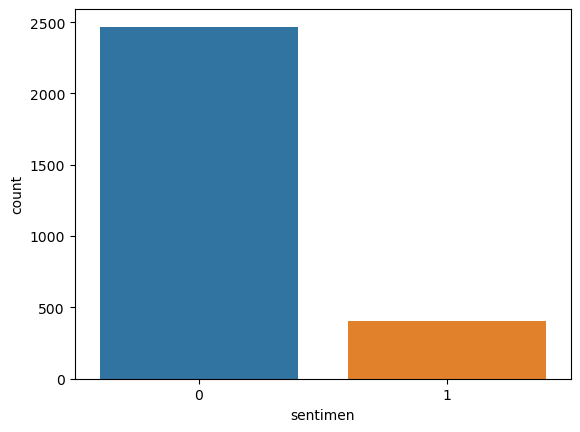

In [20]:
#visualisasi
# menampilkan jumlah data untuk setiap sentimen
sns.countplot(x='sentimen', data=data)
plt.show()

In [21]:
from imblearn.over_sampling import SMOTE
#X yang ditetapkan merupakan atribut yang mempengaruhi sentimen
#Y merupakan sentimen itu sendiri
x = tf_v
y = data['sentimen']

In [22]:
sm = SMOTE(random_state=42)
X_sampling, Y_sampling = sm.fit_resample(x, y)

In [23]:
print(X_sampling.shape)
print(Y_sampling.shape)

(4936, 3664)
(4936,)


<function matplotlib.pyplot.show(close=None, block=None)>

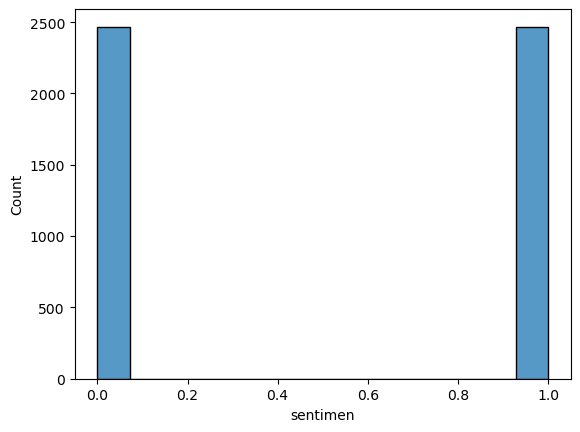

In [24]:
sns.histplot(data=Y_sampling)
plt.show

# SPLITTING DATA

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_sampling,Y_sampling, test_size=0.20, random_state = 42)
X_test.shape

(988, 3664)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

classifier = MultinomialNB()
classifier.fit(X_train, Y_train)
naive_bayes_pred = classifier.predict(X_test)

In [27]:
print('Akurasi Model    : ', accuracy_score(naive_bayes_pred, Y_test))

Akurasi Model    :  0.8421052631578947


In [28]:
print(classification_report(Y_test, naive_bayes_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       495
           1       0.80      0.92      0.85       493

    accuracy                           0.84       988
   macro avg       0.85      0.84      0.84       988
weighted avg       0.85      0.84      0.84       988



In [29]:
conma = confusion_matrix(Y_test, naive_bayes_pred)
conma

array([[380, 115],
       [ 41, 452]], dtype=int64)

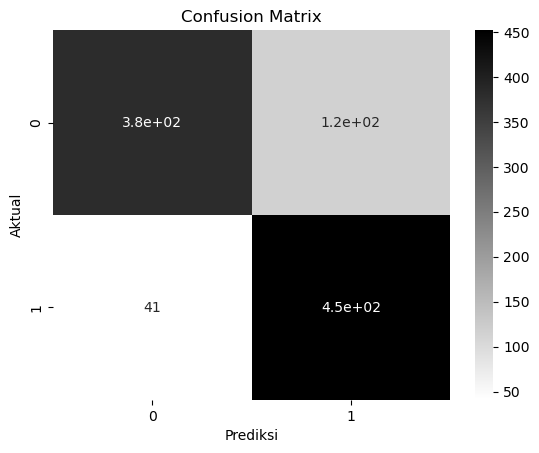

In [30]:
sns.heatmap(conma, annot=True, cmap='binary')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',  C = (10.0) , random_state = 42)
classifier.fit(X_train, Y_train)
svm_pred = classifier.predict(X_test)

In [32]:
print('Akurasi Model    : ', accuracy_score(svm_pred, Y_test))

Akurasi Model    :  0.8734817813765182


In [37]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(Y_test, svm_pred)

print('Root Mean Square Error :', RMSE)

Root Mean Square Error : 0.12651821862348178


In [33]:
print(classification_report(Y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       495
           1       0.81      0.98      0.89       493

    accuracy                           0.87       988
   macro avg       0.89      0.87      0.87       988
weighted avg       0.89      0.87      0.87       988



In [34]:
conma2 = confusion_matrix(Y_test, svm_pred)
conma2

array([[379, 116],
       [  9, 484]], dtype=int64)

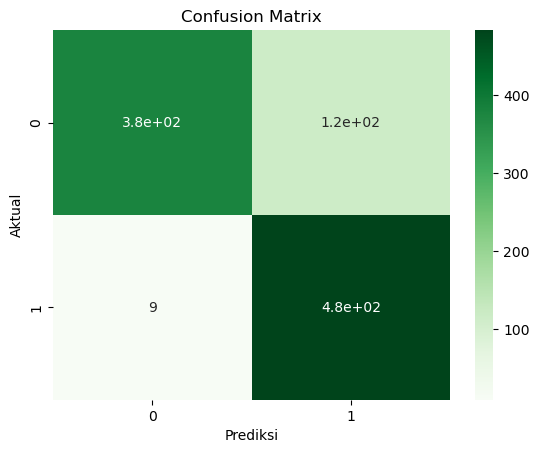

In [35]:
sns.heatmap(conma2, annot=True, cmap='Greens')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()